<a href="https://colab.research.google.com/github/arthireddy14/Machine_Learning/blob/main/Study_hours_lasso_ridge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Study hours(x) and marks(y)
x=np.array([1,2,3,4,5,6]).reshape(-1,1)
y=np.array([35,40,50,60,65,70])

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

lin_reg=LinearRegression()
lin_reg.fit(x_train,y_train)

y_train_pred=lin_reg.predict(x_train)
y_test_pred=lin_reg.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score
print("Good fit(linear regression)")
print("Train MSE : ",mean_squared_error(y_train,y_train_pred))
print("Train R2 : ",r2_score(y_train,y_train_pred))

Good fit(linear regression)
Train MSE :  1.875
Train R2 :  0.9657142857142857


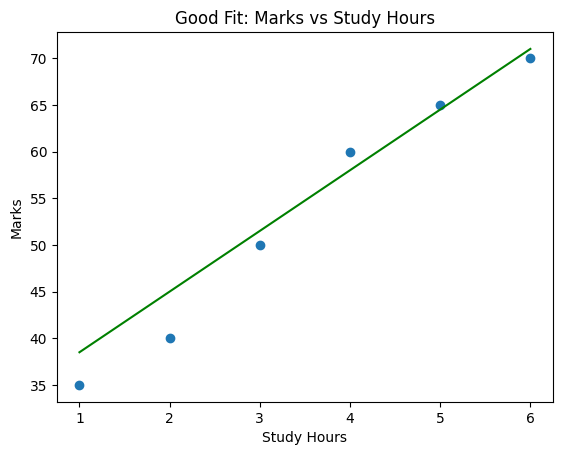

In [ ]:
plt.scatter(x, y)
plt.plot(x, lin_reg.predict(x), color='green')
plt.title("Good Fit: Marks vs Study Hours")
plt.xlabel("Study Hours")
plt.ylabel("Marks")
plt.show()

In [ ]:
poly=PolynomialFeatures(degree=5)

x_train_poly=poly.fit_transform(x_train)
x_test_poly=poly.transform(x_test)

overfit_model=LinearRegression()
overfit_model.fit(x_train_poly,y_train)

y_train_pred_poly=overfit_model.predict(x_train_poly)
y_test_pred_poly=overfit_model.predict(x_test_poly)


In [ ]:
print("Over fitting(Polynomial degree=5)")
print("Train MSE : ",mean_squared_error(y_train,y_train_pred_poly))
print("Train R2 : ",r2_score(y_train,y_train_pred_poly))

Over fitting(Polynomial degree=5)
Train MSE :  8.363894592162157e-24
Train R2 :  1.0


In [ ]:
x_grid=np.linspace(1,6,100).reshape(-1,1)
x_grid_poly=poly.fit_transform(x_grid)


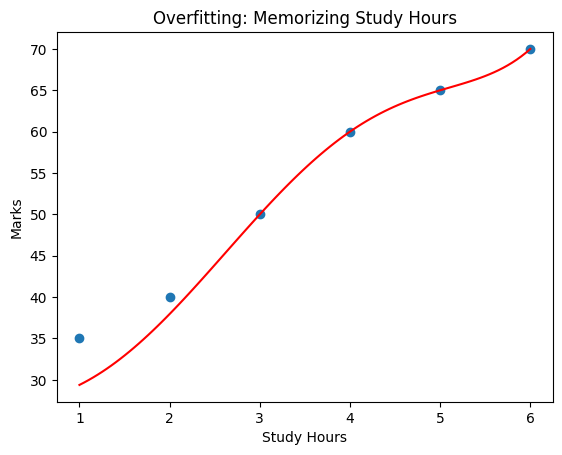

In [ ]:
plt.scatter(x, y)
plt.plot(x_grid, overfit_model.predict(x_grid_poly), color='red')
plt.title("Overfitting: Memorizing Study Hours")
plt.xlabel("Study Hours")
plt.ylabel("Marks")
plt.show()

Ridge Regression to reduce overfitting

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=5)
x_poly = poly.fit_transform(x)

In [ ]:
from sklearn.linear_model import Ridge
ridge=Ridge(alpha=1)
ridge.fit(x_poly,y)
y_ridge_pred=ridge.predict(x_poly)

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score
print("Ridge Regression")
print("Ridge MSE : ",mean_squared_error(y,y_ridge_pred))
print("Ridge R2 : ",r2_score(y,y_ridge_pred))

Ridge Regression
Ridge MSE :  0.24058058055628095
Ridge R2 :  0.9985320506949108


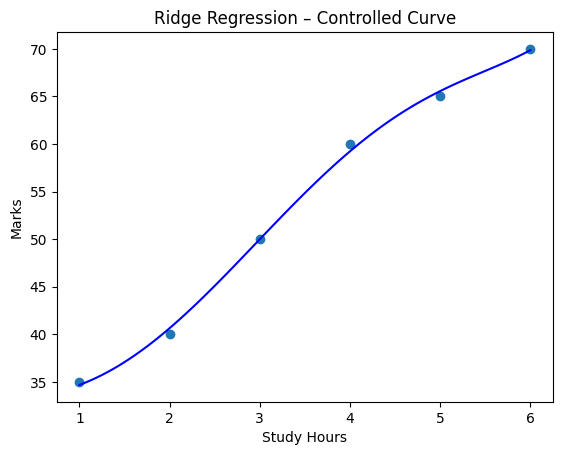

In [ ]:
import matplotlib.pyplot as plt

x_grid = np.linspace(1, 6, 100).reshape(-1, 1)
x_grid_poly = poly.transform(x_grid)

plt.scatter(x, y)
plt.plot(x_grid, ridge.predict(x_grid_poly), color='blue')
plt.title("Ridge Regression – Controlled Curve")
plt.xlabel("Study Hours")
plt.ylabel("Marks")
plt.show()

Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso
lasso=Lasso(alpha=0.1)
lasso.fit(x_poly,y)
y_lasso_pred=lasso.predict(x_poly)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.580e+00, tolerance: 9.833e-02
  model = cd_fast.enet_coordinate_descent(


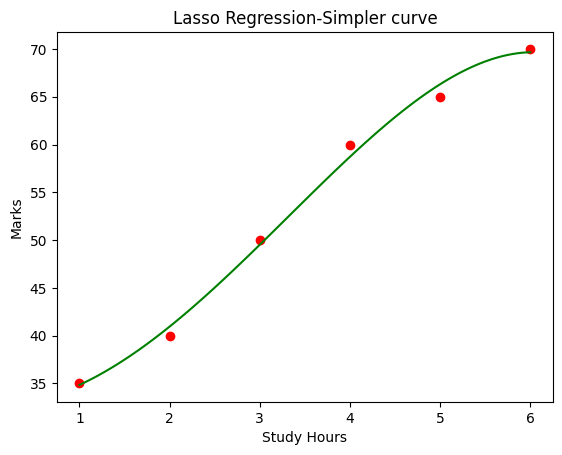

In [ ]:
plt.scatter(x,y,color='red')
plt.plot(x_grid,lasso.predict(x_grid_poly),color='green')
plt.title("Lasso Regression-Simpler curve")
plt.xlabel("Study Hours")
plt.ylabel("Marks")
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

print("Ridge MSE:", mean_squared_error(y, y_ridge_pred))
print("Ridge R² :", r2_score(y, y_ridge_pred))

print("\nLasso MSE:", mean_squared_error(y, y_lasso_pred))
print("Lasso R² :", r2_score(y, y_lasso_pred))

Ridge MSE: 0.24058058055628095
Ridge R² : 0.9985320506949108

Lasso MSE: 0.7727384155729786
Lasso R² : 0.9952849859388767
